<a href="https://colab.research.google.com/github/nannthd/project_AIEngineer/blob/main/drug_yolov8_adddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
!pip install pytube opencv-python-headless

In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

## Custom Training

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FpJxukTY5ewqBW8qVPzH")
project = rf.workspace("ka05").project("50_class-4")
version = project.version(2)
dataset = version.download("yolov8")

In [ ]:
%cat {dataset.location}/data.yaml

In [7]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
%cat {dataset.location}/data.yaml

## Custom Training

In [ ]:
# %rm -rf /content/runs

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=10 imgsz=640 batch=16 plots=True \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
dropout=0.3

In [ ]:
!ls {HOME}/runs/detect/train/

In [11]:
from IPython.display import Image, clear_output

/content


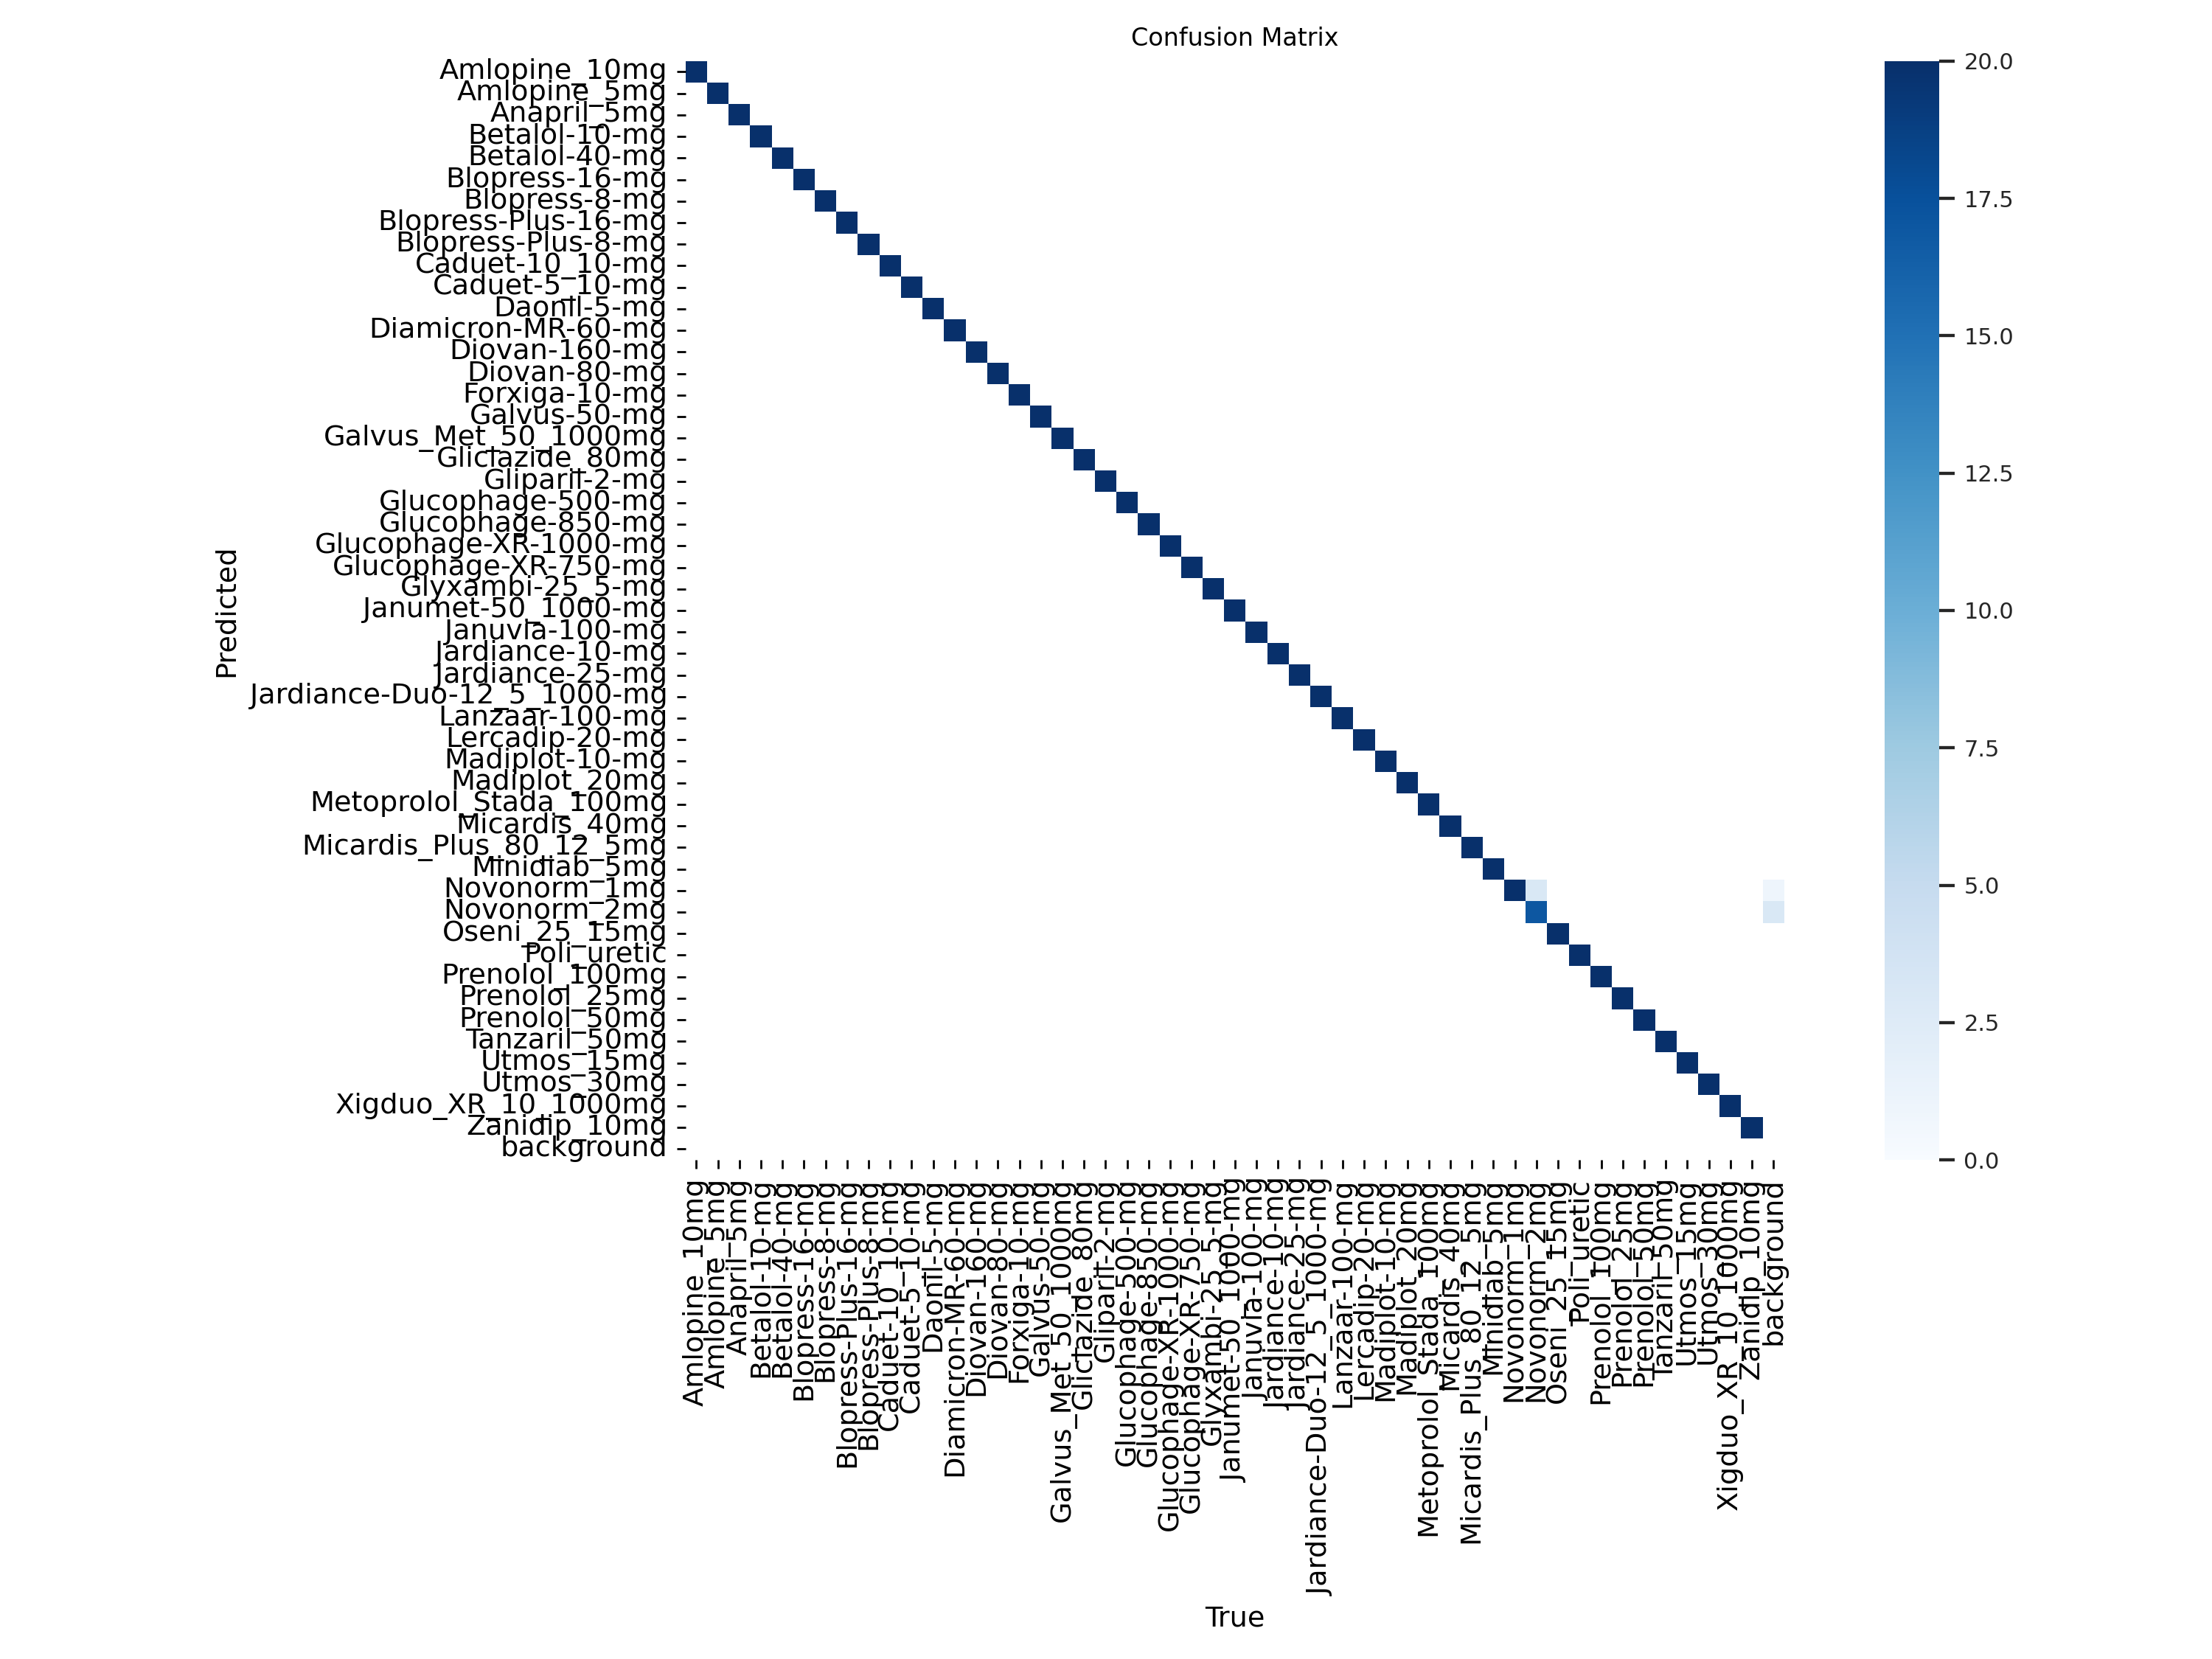

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


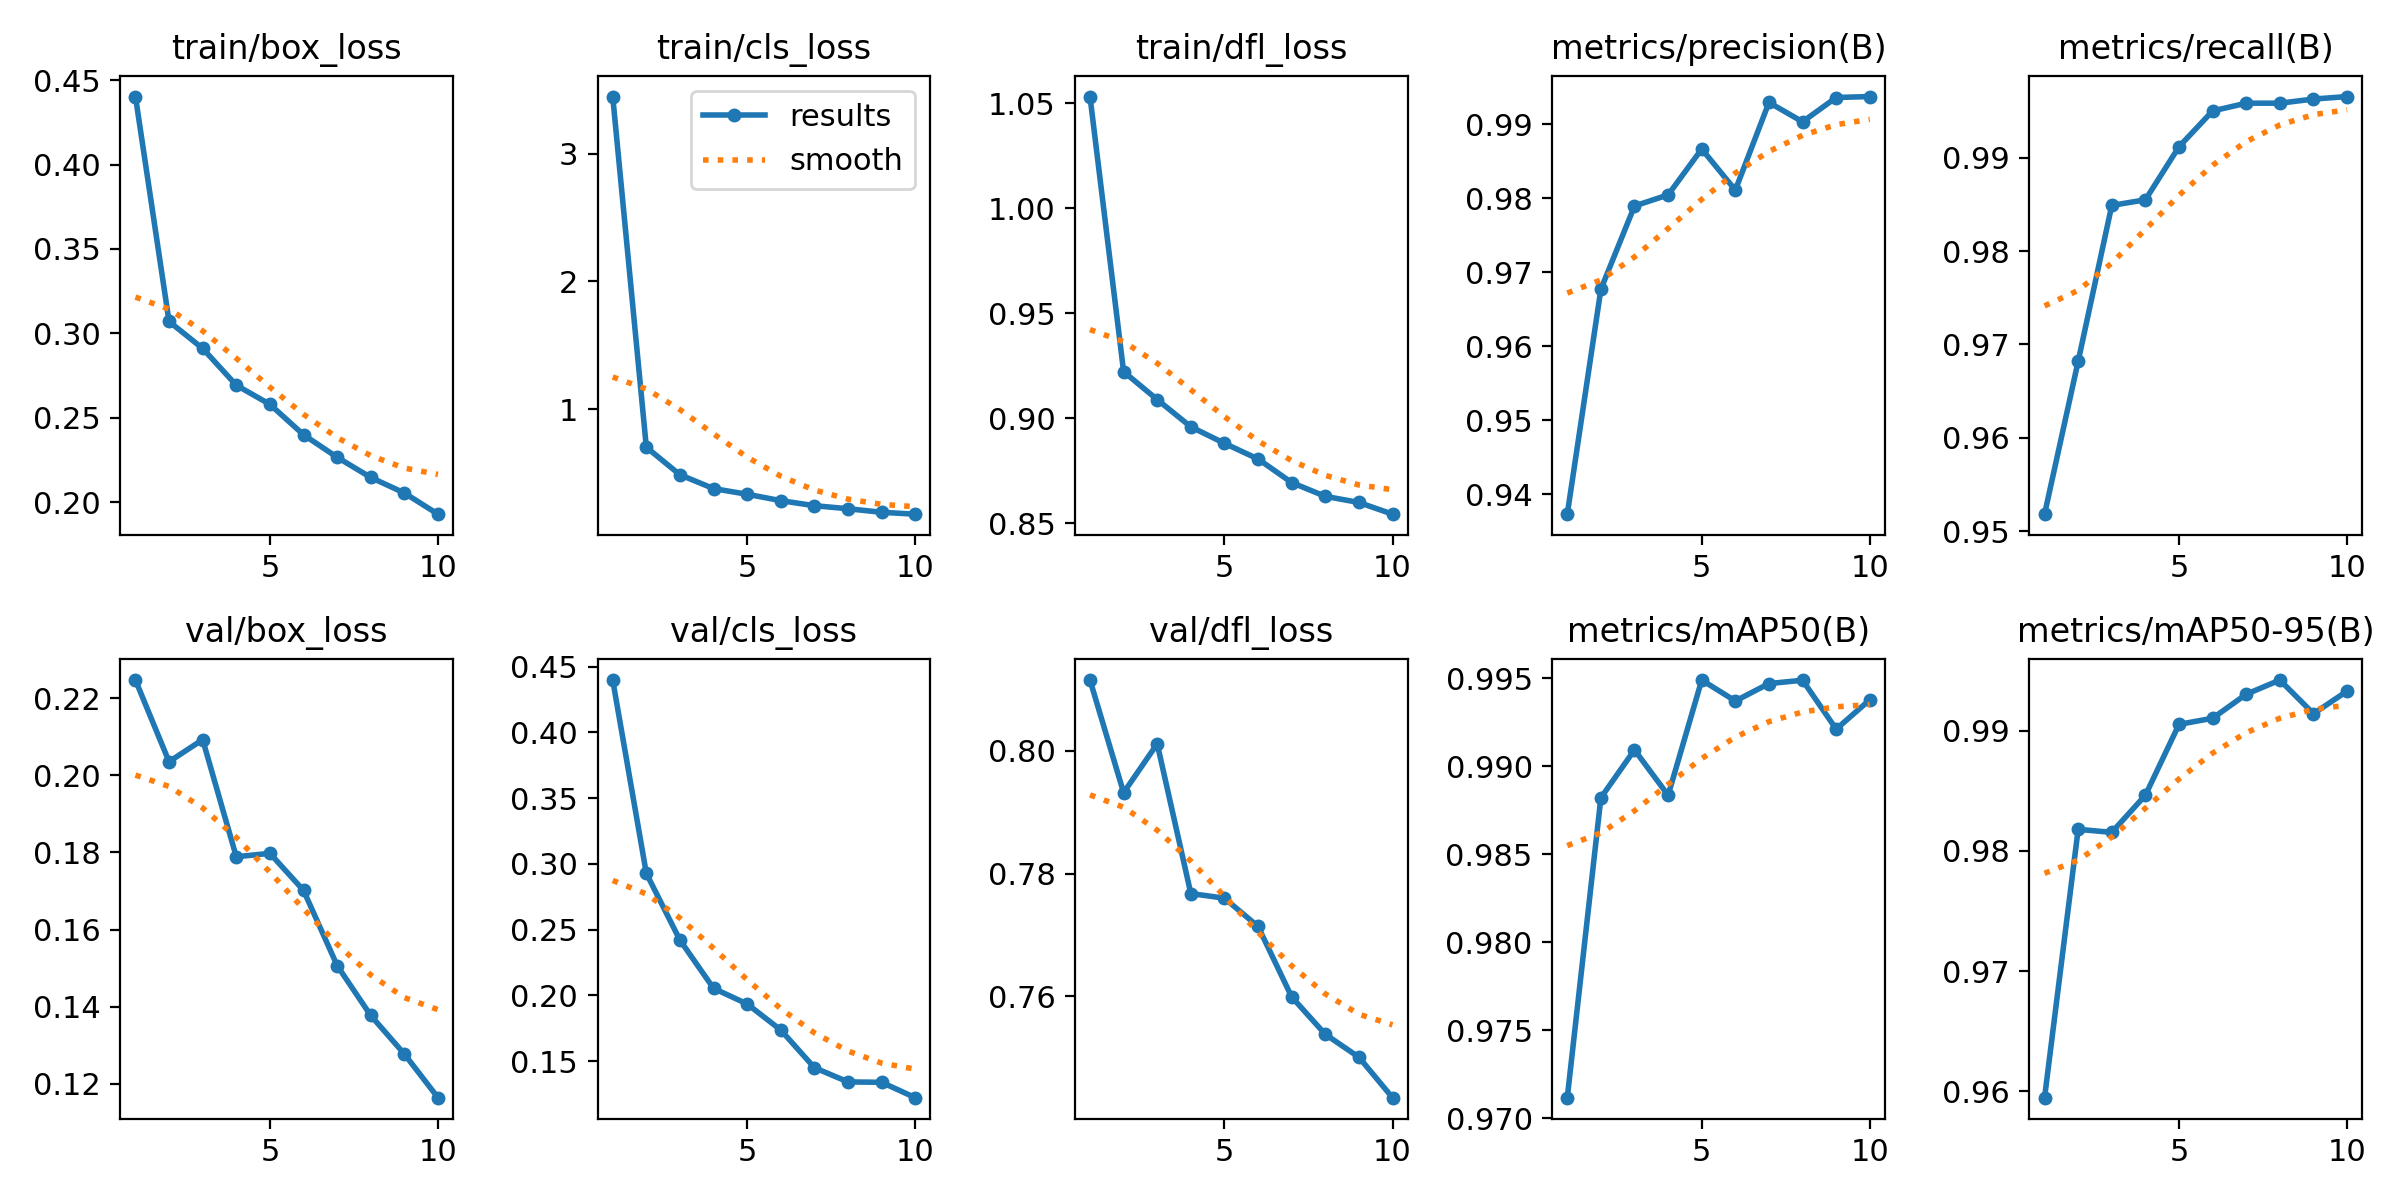

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [ ]:
!pip install supervision
import supervision as sv

In [15]:
from ultralytics import YOLO

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


WARNING ⚠️ NMS time limit 0.550s exceeded
0: 640x640 1 Blopress-Plus-8-mg, 18.3ms
Speed: 3.8ms preprocess, 18.3ms inference, 678.9ms postprocess per image at shape (1, 3, 640, 640)


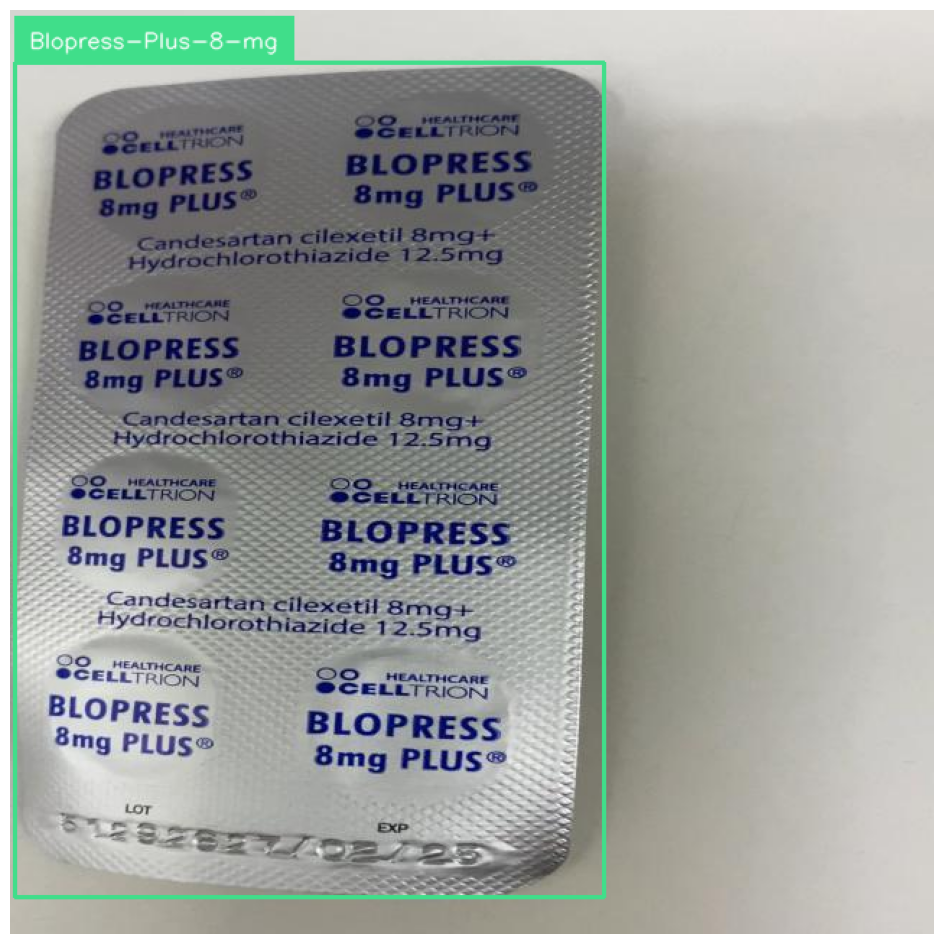

In [16]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
test_img = "/content/IMG_3433.jpg"

In [ ]:
pred = model.predict(test_img, save=True)
pred


0: 640x640 1 Zanidip_10mg, 16.8ms
Speed: 4.2ms preprocess, 16.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


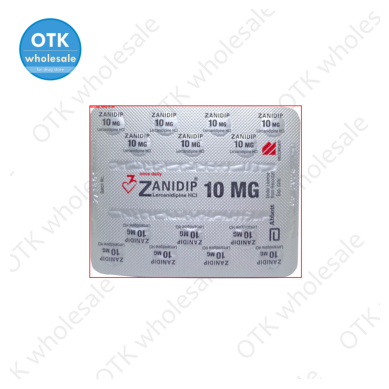

Class: Zanidip_10mg, Confidence: 0.89, Bbox: [322.7906188964844, 391.77789306640625, 1182.729736328125, 1089.4749755859375]


In [17]:
# add data
# Import libraries
import torch
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Load image
img_path = '/content/Z.png'
image = Image.open(img_path)

# Perform prediction
results = model.predict(image)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        label = result.names[int(box.cls)]
        confidence = float(box.conf)  # Convert tensor to float
        draw.rectangle(((x1, y1), (x2, y2)), outline="red", width=3)
        draw.text((x1, y1), f"{label} {confidence:.2f}", fill="red")

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Print out the results
for result in results:
    for box in result.boxes:
        print(f"Class: {result.names[int(box.cls)]}, Confidence: {float(box.conf):.2f}, Bbox: {box.xyxy[0].tolist()}")